# E-Commerce Data Analysis

# 1.0 Background

According to statista.com(https://www.statista.com/topics/871/online-shopping/#topicOverview), over the last few years, e-commerce has become an indispensable part of global retail. Like many other industries, buying and selling goods has undergone a substantial transformation following the advent of the internet, and thanks to the ongoing digitalization of modern life, consumers all over the world now profit from the perks of online transactions. 

As global internet access and adoption rapidly increase, with over five billion internet users worldwide, the number of people making purchases online is ever-increasing. In 2022, retail e-commerce sales were estimated to exceed 5.7 trillion U.S. dollars worldwide, and this figure is expected to reach new heights in the coming years, the report further states.

In terms of the leading internet and online services companies worldwide 2022, by market cap, Amazon is the biggest consumer internet and online service company worldwide with a market cap of approximately 857 billion U.S. dollars as of December 2022. Amazon was ranked first among selected online companies operating in the retail, real estate, mobility, travel and hospitality sectors. The digital commerce platform Alibaba.com ranked second with a market cap of 233 billion U.S. dollars.

# 2.0 Objectives

The objectives of the analysis are; 

1. What are the sales figures for each country?
2. What is the overall sales trend?
3. How many new customers are there each month?
4. When do customers make the most purchases?
5. Which is the best selling product in each country?
6. When were the largest orders made?
7. Which customers made the largest orders?

# 3.0 Data Understanding 

Context
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

Acknowledgements
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

The data contains 541,910 rows and 8 columns. 

Variable Description

InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product code that consists 5 digits.
Description: Product name.
Quantity: The quantities of each product per transaction.
InvoiceDate: Represents the day and time when each transaction was generated.
UnitPrice: Product price per unit.
CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
Country: Name of the country where each customer resides.

# 4.0 Analysis

In [56]:
# Loading the required libraries
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Time variables
import calendar
import datetime as dt

%matplotlib inline

In [2]:
# Loading the data

ecomm = pd.read_csv("C:/Users/kinyanjuim/Desktop/H2_Projects_2023/Ecommerce_Data/Edata.csv", encoding='iso-8859-1')

# Overview of data and missing values
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# First 5 rows of the data
ecomm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Category count of the object types

a = ecomm['Description'].value_counts()
b = ecomm['Country'].value_counts()
 
print(a, b)

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64 United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Swede

In [5]:
# Missing Values
missing_values = ecomm.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Dealing with missing values
# Drop as we can't replace customer IDs; unique
ecomm2 = ecomm.dropna()
ecomm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
# Uniqueness in invoice numbers and stock code
# Unique values are those that appear in the data once

ecomm2.InvoiceNo.nunique()

22190

In [8]:
ecomm2.StockCode.nunique()

3684

In [9]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = ecomm2[ecomm2.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [10]:
# Using DataFrame.drop_duplicates() to keep first duplicate row
ecomm3 = ecomm2.drop_duplicates(keep='first')
ecomm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [11]:
# Create a new column
ecomm3['Total Price'] = ecomm3['Quantity']*ecomm3['UnitPrice']
ecomm3.info()

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\348064422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecomm3['Total Price'] = ecomm3['Quantity']*ecomm3['UnitPrice']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   Total Price  401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.6+ MB


In [12]:
# Splitting invoice date to year, month, and time
ecomm3['ModifiedDate'] = pd.to_datetime(ecomm3['InvoiceDate'])
ecomm3.info()

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\941502115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecomm3['ModifiedDate'] = pd.to_datetime(ecomm3['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     401604 non-null  object        
 1   StockCode     401604 non-null  object        
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   InvoiceDate   401604 non-null  object        
 5   UnitPrice     401604 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       401604 non-null  object        
 8   Total Price   401604 non-null  float64       
 9   ModifiedDate  401604 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 33.7+ MB


In [13]:
# Extracting some columns in date column
ecomm3['year'] = ecomm3['ModifiedDate'].dt.year
ecomm3['month'] = ecomm3['ModifiedDate'].dt.month
ecomm3['day'] = ecomm3['ModifiedDate'].dt.day
ecomm3['time'] = ecomm3['ModifiedDate'].dt.time

ecomm3.info()


C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\2505806733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecomm3['year'] = ecomm3['ModifiedDate'].dt.year
C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\2505806733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecomm3['month'] = ecomm3['ModifiedDate'].dt.month
C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\2505806733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     401604 non-null  object        
 1   StockCode     401604 non-null  object        
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   InvoiceDate   401604 non-null  object        
 5   UnitPrice     401604 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       401604 non-null  object        
 8   Total Price   401604 non-null  float64       
 9   ModifiedDate  401604 non-null  datetime64[ns]
 10  year          401604 non-null  int64         
 11  month         401604 non-null  int64         
 12  day           401604 non-null  int64         
 13  time          401604 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 

In [14]:
ecomm3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,ModifiedDate,year,month,day,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,2010,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,2010,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,2010,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,2010,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,2010,12,1,08:26:00


# 5.0 Exploring Distributions

In [15]:
# Omit negative values in quantity
ecomm3 = ecomm3[ecomm3.Quantity>0]
ecomm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392732 non-null  object        
 1   StockCode     392732 non-null  object        
 2   Description   392732 non-null  object        
 3   Quantity      392732 non-null  int64         
 4   InvoiceDate   392732 non-null  object        
 5   UnitPrice     392732 non-null  float64       
 6   CustomerID    392732 non-null  float64       
 7   Country       392732 non-null  object        
 8   Total Price   392732 non-null  float64       
 9   ModifiedDate  392732 non-null  datetime64[ns]
 10  year          392732 non-null  int64         
 11  month         392732 non-null  int64         
 12  day           392732 non-null  int64         
 13  time          392732 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 

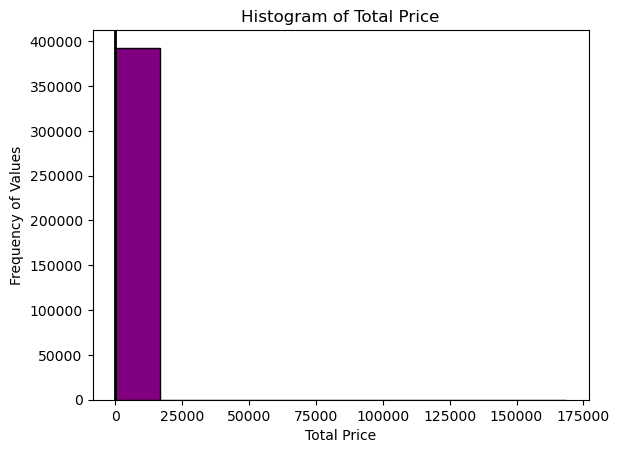

In [16]:
# Histogram of TotalPrice

plt.hist(ecomm3['Total Price'], bins = 10, color = "purple", edgecolor = 'black')

plt.xlabel('Total Price')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Total Price')

# Mean of Sale Price
plt.axvline(ecomm3['Total Price'].mean(), color = "black", linewidth = 2)
plt.show()

In [17]:
# How many orders?
orders = ecomm3.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()
orders

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


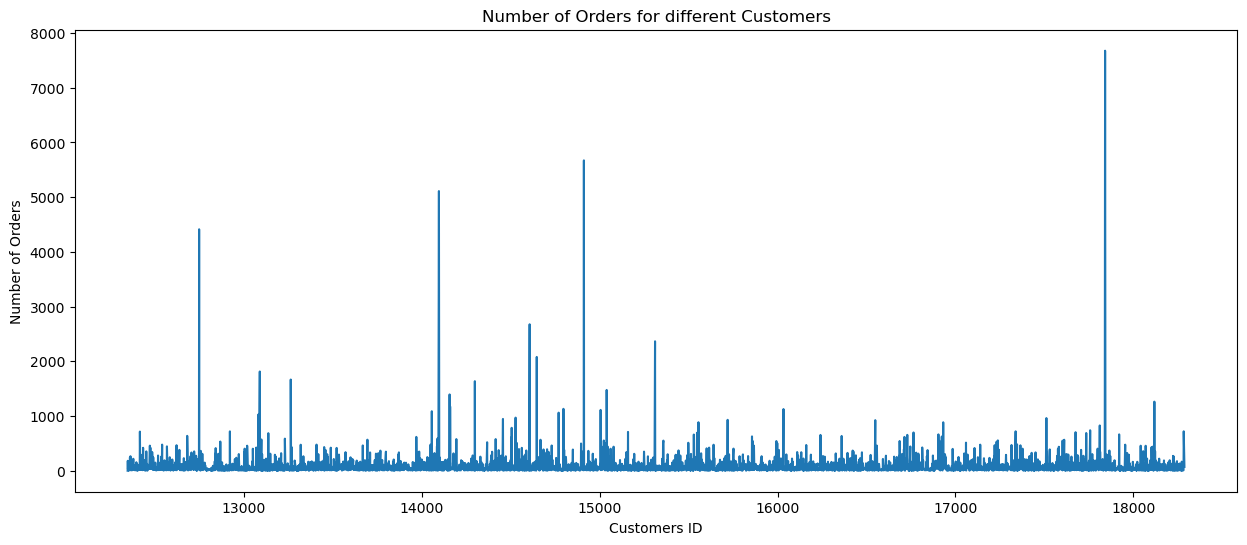

In [18]:
orders = ecomm3.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [19]:
# Top 5 orders
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677


                Total Price
Country                    
United Kingdom  7285024.644
Netherlands      285446.340
EIRE             265262.460
Germany          228678.400
France           208934.310
Australia        138453.810
Spain             61558.560
Switzerland       56443.950
Belgium           41196.340
Sweden            38367.830


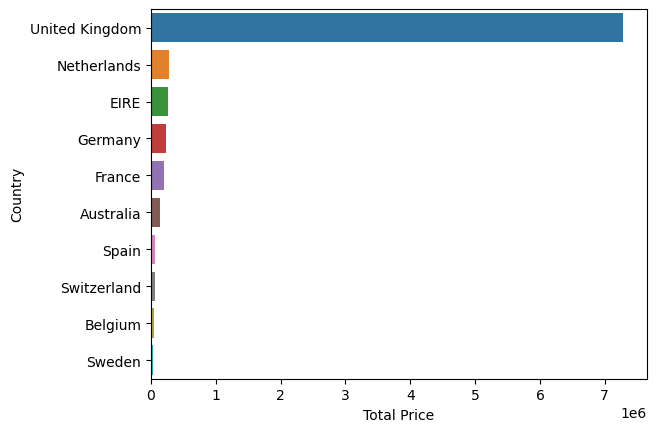

In [20]:
# top 10 countries

# Now, we'll create a new dataframe that contains only the 'Country' and 'TotalPrice' columns
ecomm3_countries = ecomm3[['Country', 'Total Price']]

# Next, we'll group the data by country and sum the total price for each country
ecomm3_countries = ecomm3_countries.groupby('Country').sum()

# Finally, we'll sort the data by total price and display the top 10 countries
ecomm3_countries = ecomm3_countries.sort_values('Total Price', ascending=False)
print(ecomm3_countries.head(10))

# Next, we'll use the seaborn library to create a horizontal bar plot
sns.barplot(x='Total Price', y='Country', data=ecomm3_countries.reset_index().head(10), orient='h')

# Finally, we'll show the plot
plt.show()



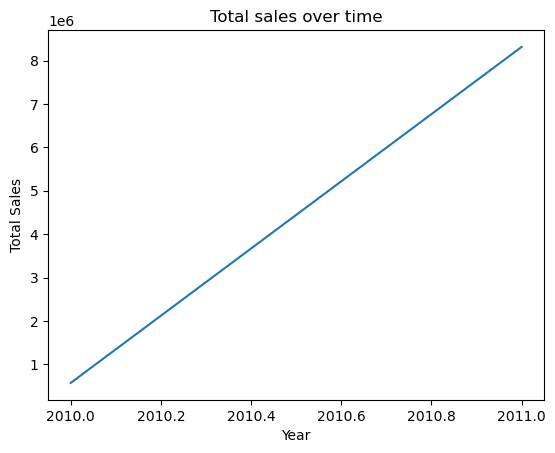

In [21]:
total_sales_by_year = ecomm3.groupby('year')['Total Price'].sum()
total_sales_by_year

# Now, we can use Seaborn to plot the total sales over time
sns.lineplot(x=total_sales_by_year.index, y=total_sales_by_year.values)
plt.title("Total sales over time")
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Description                         Country       
PAPER CRAFT , LITTLE BIRDIE         United Kingdom    168469.60
REGENCY CAKESTAND 3 TIER            United Kingdom    110713.00
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom     94805.50
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom     80291.44
JUMBO BAG RED RETROSPOT             United Kingdom     77191.33
PARTY BUNTING                       United Kingdom     63050.28
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom     52228.68
CHILLI LIGHTS                       United Kingdom     45483.91
PAPER CHAIN KIT 50'S CHRISTMAS      United Kingdom     40392.08
PICNIC BASKET WICKER 60 PIECES      United Kingdom     39619.50
Name: Total Price, dtype: float64


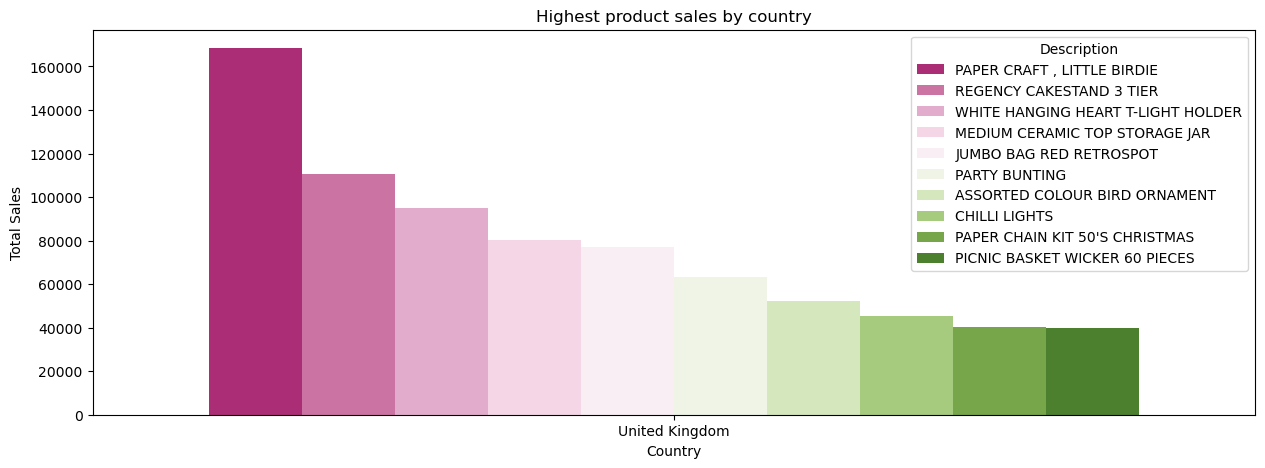

In [22]:
# Products with the highest sales
fig, ax = plt.subplots(figsize=(15,5))

# Grouping the data by product and country and summing the total sales for each group
product_sales_by_country = ecomm3.groupby(['Description', 'Country'])['Total Price'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

# Now, we can use Seaborn to plot the top 10 products with the highest sales, along with the country where they had the highest sales
top_products = product_sales_by_country.sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='Total Price', hue='Description', data=top_products, palette="PiYG")
plt.title("Highest product sales by country")
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [23]:
# Converting month number to month name
ecomm3['month'] = ecomm3['month'].apply(lambda x: calendar.month_name[x])
ecomm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392732 non-null  object        
 1   StockCode     392732 non-null  object        
 2   Description   392732 non-null  object        
 3   Quantity      392732 non-null  int64         
 4   InvoiceDate   392732 non-null  object        
 5   UnitPrice     392732 non-null  float64       
 6   CustomerID    392732 non-null  float64       
 7   Country       392732 non-null  object        
 8   Total Price   392732 non-null  float64       
 9   ModifiedDate  392732 non-null  datetime64[ns]
 10  year          392732 non-null  int64         
 11  month         392732 non-null  object        
 12  day           392732 non-null  int64         
 13  time          392732 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 

In [24]:
# Months with the highest revenue
desired_year = [2011]
filtered_df = ecomm3[ecomm3['year'].isin(desired_year)]

total_sales_by_month = filtered_df.groupby('month')['Total Price'].sum().reset_index()

In [25]:
# Ordering the months
from calendar import month_name
month_lookup = list(month_name)
total_sales_by_month.month = sorted(total_sales_by_month.month, key=month_lookup.index)
total_sales_by_month

,month,Total Price
0,January,468374.331
1,February,644051.040
2,March,517190.440
3,April,446084.920
4,May,568101.310
5,June,598962.901
6,July,660046.050
7,August,594081.760
8,September,677355.150
9,October,1156205.610


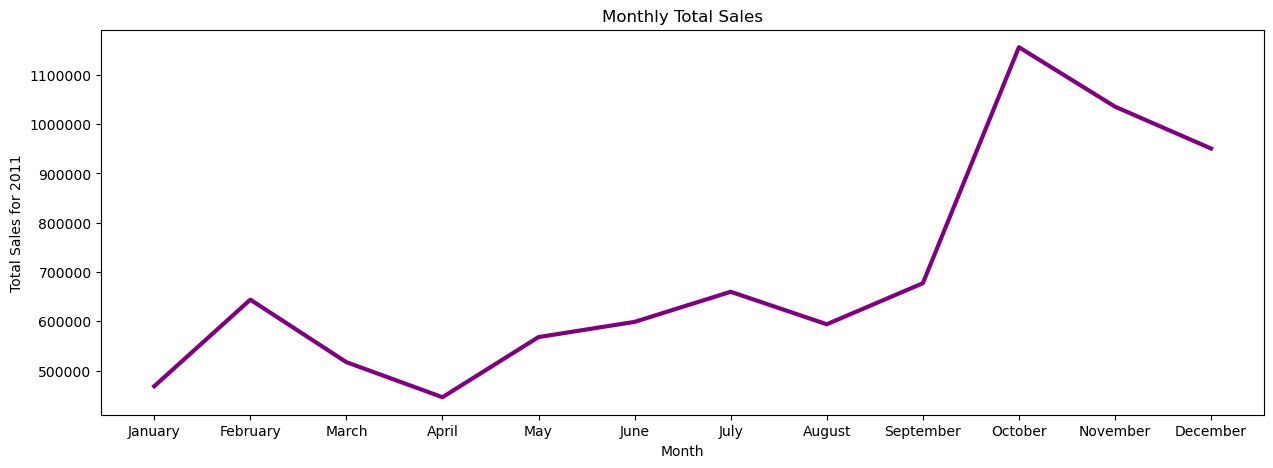

In [26]:
fig, ax = plt.subplots(figsize=(15,5))

# Define the custom order of months
#Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.ticklabel_format(style='plain')

# Now, we can use Seaborn to plot the total sales over time
sns.lineplot(x=total_sales_by_month['month'], y=total_sales_by_month['Total Price'], data = total_sales_by_month, color = 'purple',
             linewidth=3)
plt.title("Monthly Total Sales")
plt.xlabel('Month')
plt.ylabel('Total Sales for 2011')
plt.show()

The best selling months are October, November, and December since the revenue rises month after month throughout the year.

Store needs to implement a cusomer revenue strategy for the earlier months of the year while ensuring retention throughout the year.

In [27]:
ecomm3.info()
# converting 'Weight' from float to int
ecomm3['CustomerID'] = ecomm3['CustomerID'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392732 non-null  object        
 1   StockCode     392732 non-null  object        
 2   Description   392732 non-null  object        
 3   Quantity      392732 non-null  int64         
 4   InvoiceDate   392732 non-null  object        
 5   UnitPrice     392732 non-null  float64       
 6   CustomerID    392732 non-null  float64       
 7   Country       392732 non-null  object        
 8   Total Price   392732 non-null  float64       
 9   ModifiedDate  392732 non-null  datetime64[ns]
 10  year          392732 non-null  int64         
 11  month         392732 non-null  object        
 12  day           392732 non-null  int64         
 13  time          392732 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 

In [28]:
# Who are the devoted customers

top_customer_all = ecomm3.groupby(['CustomerID'])['Quantity', 'Total Price'].sum().reset_index()
top_customer_sorted_q = top_customer_all.sort_values(by=["Quantity"], ascending=False)
top_customer_sorted_r = top_customer_all.sort_values(by=["Total Price"], ascending=False)

top_customer_quantity = top_customer_sorted_q.head(10)
print(top_customer_quantity)
top_customer_revenue = top_customer_sorted_r.head(10)
print(top_customer_revenue)

      CustomerID  Quantity  Total Price
1690       14646    197491    280206.02
3009       16446     80997    168472.50
1880       14911     80490    143711.17
55         12415     77670    124914.53
0          12346     74215     77183.60
3729       17450     69973    194390.79
3772       17511     64549     91062.38
4202       18102     64124    259657.30
997        13694     63312     65039.62
1435       14298     58343     51527.30
      CustomerID  Quantity  Total Price
1690       14646    197491    280206.02
4202       18102     64124    259657.30
3729       17450     69973    194390.79
3009       16446     80997    168472.50
1880       14911     80490    143711.17
55         12415     77670    124914.53
1334       14156     57768    117210.08
3772       17511     64549     91062.38
2703       16029     40108     80850.84
0          12346     74215     77183.60


C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\96531084.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_customer_all = ecomm3.groupby(['CustomerID'])['Quantity', 'Total Price'].sum().reset_index()


Text(0.5, 1.0, 'Top Customers According to Sales')

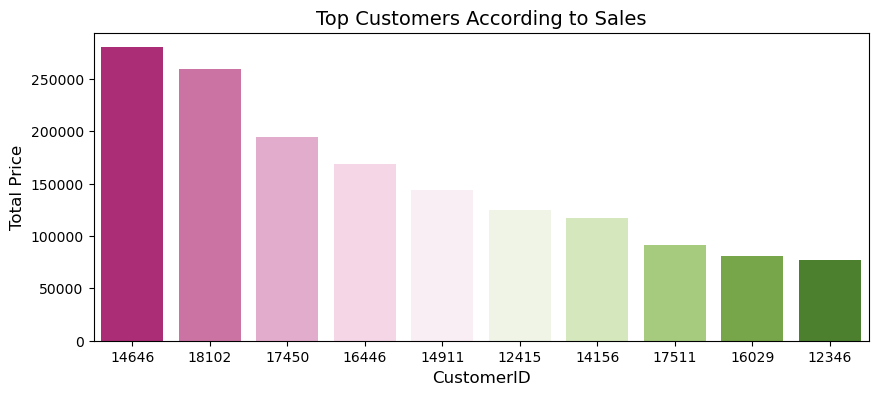

In [29]:
#Top Customers According to Sales

plt.figure(figsize=(10,4))

# make barplot and sort bars in descending order
sns.barplot(x='CustomerID', 
            y="Total Price", 
            data=top_customer_revenue, 
            order=top_customer_revenue.sort_values('Total Price',ascending = False).CustomerID, palette="PiYG")
# set labels
plt.xlabel("CustomerID", size=12)
plt.ylabel("Total Price", size=12)
plt.title("Top Customers According to Sales", size=14)

In [30]:
# Assuming loss of the top customers, how would the magnitude of total sales be affected?
top_customers = filtered_df.groupby(['CustomerID'])['Quantity', 'Total Price'].sum().reset_index()
top_customer_for2011= top_customers.sort_values(by=["Total Price"], ascending=False)
print(top_customer_for2011.head(10))

print(top_customer_for2011['Total Price'].sum())

top_customer_for2011['Total Price'].max()/top_customer_for2011['Total Price'].sum()*100

      CustomerID  Quantity  Total Price
1654     14646.0    190777    271614.14
4087     18102.0     57429    231822.69
3637     17450.0     69187    192361.95
2937     16446.0     80997    168472.50
1841     14911.0     77159    135973.23
55       12415.0     77670    124914.53
1305     14156.0     56220    116887.88
3678     17511.0     58123     84351.30
0        12346.0     74215     77183.60
2637     16029.0     32152     67738.32
8316786.163999999


C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1324\4170304151.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_customers = filtered_df.groupby(['CustomerID'])['Quantity', 'Total Price'].sum().reset_index()


3.2658545578063274

In [31]:
print(100 -(((8316786.163999999 - 271614.14)/(8316786.163999999))*100))

print("\nTotal Sales would decrease by 3.26% assuming loss of top client. Client Concentration is at 3.26% of the total sales")


3.265854557806321

Total Sales would decrease by 3.26% assuming loss of top client. Client Concentration is at 3.26% of the total sales


In [32]:
filtered_df['month'].value_counts()

November     63182
October      48796
September    39671
May          28075
June         26926
March        26872
August       26796
July         26582
April        22435
January      20991
February     19707
December     17026
Name: month, dtype: int64

In [33]:
# Customers at start of year
janmonth = ['January']
filtered_jan = filtered_df[filtered_df['month'].isin(janmonth)]

filtered_jan['CustomerID'].nunique()

741

In [34]:
# Customers at end of year
decmonth = ['December']
filtered_dec = filtered_df[filtered_df['month'].isin(decmonth)]

filtered_dec['CustomerID'].nunique()

615

In [38]:
# number of days between the earliest and latest InvoiceDate for each customer using a lambda function.
# number of unique InvoiceNo for each customer using the len() function.
# sum of Quantity for each customer using a lambda function
# um of TotalPurchase for each customer using a lambda function

uk_data=ecomm3.groupby('CustomerID').agg({'ModifiedDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'Total Price': lambda price: price.sum()})
uk_data.head()


,ModifiedDate,InvoiceNo,Quantity,Total Price
CustomerID,,,,
12346,0,1,74215,77183.60
12347,365,182,2458,4310.00
12348,282,31,2341,1797.24
12349,0,73,631,1757.55
12350,0,17,197,334.40


In [39]:
# Change the name of columns
uk_data.columns=['num_days','num_transactions','num_units','spent_money']
uk_data.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346,0,1,74215,77183.60
12347,365,182,2458,4310.00
12348,282,31,2341,1797.24
12349,0,73,631,1757.55
12350,0,17,197,334.40


In [41]:
# Average Order Value
uk_data['avg_order_value']=uk_data['spent_money']/uk_data['num_transactions']
uk_data.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346,0,1,74215,77183.60,77183.600000
12347,365,182,2458,4310.00,23.681319
12348,282,31,2341,1797.24,57.975484
12349,0,73,631,1757.55,24.076027
12350,0,17,197,334.40,19.670588


In [43]:
# Purchase frequency
purchase_frequency=sum(uk_data['num_transactions'])/uk_data.shape[0]
purchase_frequency


90.51209956211109

In [45]:
# Repeat Rate
repeat_rate=uk_data[uk_data.num_transactions > 1].shape[0]/uk_data.shape[0]
repeat_rate

0.9834063148190827

In [50]:
#Churn Rate
churn_rate=1-repeat_rate
churn_rate*100

1.6593685180917306

In [51]:
print(purchase_frequency,repeat_rate,churn_rate)

90.51209956211109 0.9834063148190827 0.016593685180917306


In [69]:
ecomm3['InvoiceDate'].min(),ecomm3['InvoiceDate'].max()
from pandas import Timestamp
(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

PRESENT = dt.datetime(2011,12,10)
ecomm3['InvoiceDate'] = pd.to_datetime(ecomm3['InvoiceDate'])

RFM allows us to segment customers based on their transaction history, including: Time since their last transaction (recency), The number of transactions they have made (frequency), and. The amount of money they have spent on the platform (monetary value).

# Understanding Recency, Frequency, Monetary Value

The concept of recency, frequency, monetary value (RFM) is thought to date from an article by Jan Roelf Bult and Tom Wansbeek, titled “Optimal Selection for Direct Mail,” published in a 1995 issue of Marketing Science.

If you are familiar with the Pareto Principle or the 80/20 rule, It states that 80% of the consequences come from 20% of the causes. 

Thus in the business case, RFM analysis often supports the marketing adage that “80% of business comes from 20% of the customers.”

The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase

Frequency: How often a customer makes a purchase

Monetary value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The “best” customer would receive a top score in every category.

These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.

In [120]:
# RFM Analysis

rfm= ecomm3.groupby('CustomerID').agg({'ModifiedDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Total Price': lambda price: price.sum()})
rfm.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ModifiedDate  4339 non-null   int64  
 1   InvoiceNo     4339 non-null   int64  
 2   Total Price   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [121]:
# Change the name of columns 
rfm.columns=['monetary','recency', 'frequency']
print(rfm)
rfm.info()

            monetary  recency  frequency
CustomerID                              
12346            325        1   77183.60
12347              2      182    4310.00
12348             75       31    1797.24
12349             18       73    1757.55
12350            310       17     334.40
...              ...      ...        ...
18280            277       10     180.60
18281            180        7      80.82
18282              7       12     178.05
18283              3      721    2045.53
18287             42       70    1837.28

[4339 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   monetary   4339 non-null   int64  
 1   recency    4339 non-null   int64  
 2   frequency  4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [122]:
# Quantiles of RFM values
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [123]:
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,325,1,77183.60,1,1,1
12347,2,182,4310.00,4,1,4
12348,75,31,1797.24,2,1,2
12349,18,73,1757.55,3,1,3
12350,310,17,334.40,1,3,1


Segment	Description

Champions- Bought recently, buy often and spend the most

Loyal Customers	Buy on a regular basis. Responsive to promotions.

Potential Loyalist- Recent customers with average frequency.

Recent Customer- Bought most recently, but not often.

Promising - Recent shoppers, but haven’t spent much.

Customers Needing Attention-Above average recency, frequency and monetary values. May not have bought very recently though.

About To Sleep- Below average recency and frequency. Will lose them if not reactivated.

At Risk-Purchased often but a long time ago. Need to bring them back!

Can’t Lose Them	- Used to purchase frequently but haven’t returned for a long time.

Hibernating -Last purchase was long back and low number of orders. May be lost.


In [134]:
# Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 12346 to 18287
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   monetary    4339 non-null   int64   
 1   recency     4339 non-null   int64   
 2   frequency   4339 non-null   float64 
 3   r_quartile  4339 non-null   category
 4   f_quartile  4339 non-null   category
 5   m_quartile  4339 non-null   category
 6   RFM_Score   4339 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 182.8+ KB


In [135]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}
rfm['r_quartile'] = rfm['r_quartile'].astype(int)
rfm['f_quartile'] = rfm['f_quartile'].astype(int)

rfm['Segment'] = rfm['r_quartile'].map(str) + rfm['f_quartile'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score,Segment
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,1,111,hibernating
12347,2,182,4310.00,4,1,4,414,promising
12348,75,31,1797.24,2,1,2,212,hibernating
12349,18,73,1757.55,3,1,3,313,about to sleep
12350,310,17,334.40,1,3,1,131,at risk


In [136]:
# saving the dataframe
# The treemap data visualisation was done in Power Bi
rfm.to_csv('rfm.csv')

# Curious?

If you are curious about some of the limitations of this model, consider checking the below link out;

https://cxmtoday.com/staff-articles/is-the-rfm-model-obsolete/#:~:text=Arthur%20Hughes%20popularized%20the%20RFM,monetary%20value%20a%20customer%20spends.

Disclaimer: This is a personal data analytics practice project purely for learning code. The views and opinions expressed in this analysis outcome are those of the authors and do not necessarily reflect the official policy or any other party.This article is for informational purposes only; please consult your advisor to determine whether this strategy is right for you.

It’s important to note that there are various moderating variables that affect all data, many of which might not have been captured in these datasets. As such, I used the data provided to practice my data tidying and plotting techniques.